# TASK 1

In [1]:
#importing required packages and dataset

import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
# using the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')

In [3]:
# Reshaping into 784 element feature vector
X_train = x_train.reshape(-1, 784)

In [4]:
#Calculating the mean and standard deviation. Initialising with empty list for calculating mean and standard deviation for each
#digits own feature vector
mean_digits = []
standard_deviation_digits = []

In [5]:
for m in range(0,10):
    FV = X_train[y_train == m]
    mean = tf.reduce_mean(FV, axis=0, keepdims=False, name=None)
    sd = tf.math.reduce_std(FV, axis=0, keepdims=False, name=None)
    mean_digits.append(mean.numpy().reshape(28, 28))
    standard_deviation_digits.append(sd.numpy().reshape(28, 28))

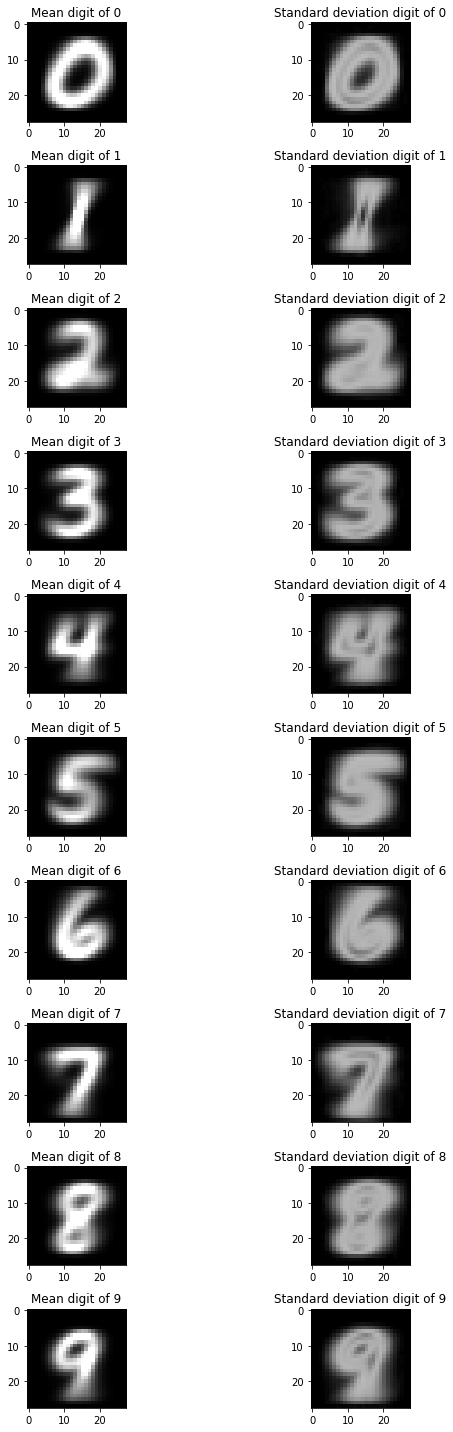

In [6]:
#Plot mean and standard deviation
fig,axes = plt.subplots(nrows=10, ncols=2, figsize=(10, 20))
for n in range(0,10):
    axes[n, 0].imshow(mean_digits[n], cmap='gray',vmin=0, vmax=155)  
    axes[n, 0].set_title('Mean digit of {}'.format(n))
    axes[n, 1].imshow(standard_deviation_digits[n], cmap='gray',vmin=0, vmax=155)
    axes[n, 1].set_title('Standard deviation digit of {}'.format(n))
fig.tight_layout()
plt.show()

# TASK 2

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [8]:
%matplotlib inline
import seaborn as sb

In [9]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [10]:
train_images = x_train.reshape(-1, 28*28)
test_images = x_test.reshape(-1, 28*28)

In [11]:
train_images = train_images.astype('float32') /255
test_images = test_images.astype('float32') /255

In [12]:
def nb(train_images, train_lables, test_images, test_lables):
    unique_train_labels = np.unique(train_labels)
    mean, v, prior, count = [], [], [], []
    for num, val in enumerate(unique_train_labels):
        current = tuple([train_labels == val])
        count.append(len(train_labels[current]))
        prior.append(len(train_labels[current])/ len(train_labels))
        mean.append(tf.math.reduce_mean(train_images[current], axis=0))
        v.append(tf.math.reduce_variance(train_images[current], axis=0))
    
    pred = []
    likelihood = []
    lcs = []
    for x in range(len(test_lables)):
        classifier = []
        sample = test_images[x]
        ll = []
        for i, val in enumerate(unique_train_labels):
            m1 = mean[i]
            var = np.square(v[i]) + 1e-2
            prob = (1/ tf.math.sqrt(2*np.pi *var)) * tf.math.exp(-np.square(sample - m1)/(2 * var))
            
            result = tf.math.reduce_sum(tf.math.log(prob))
            classifier.append(result)
            ll.append(prob)
            
        pred.append(tf.math.argmax(classifier))
        likelihood.append(ll)
        lcs.append(classifier)
        
    return pred, likelihood     

In [13]:
#Takes about 40 seconds to run this cell
prediction, likelihood = nb(train_images, train_labels, test_images, test_labels)

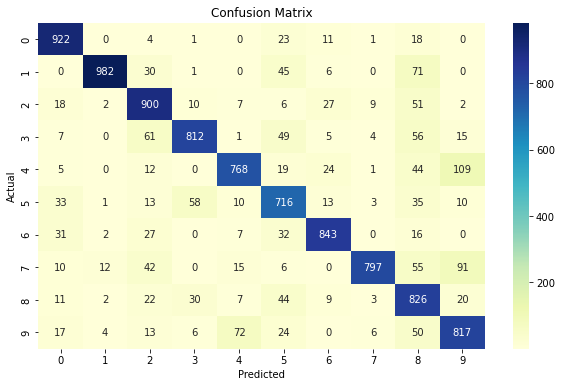

In [14]:
confusion_matrix  = tf.math.confusion_matrix(test_labels, prediction)
plt.subplots(figsize=(10, 6))
sb.heatmap(confusion_matrix ,annot = True, fmt = 'g',cmap="YlGnBu",vmin=0.2,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
print("Test Accuracy:", round((sum(np.diagonal(confusion_matrix)) / len(prediction)) * 100, 4), '%')

Test Accuracy: 83.83 %


In [16]:
print('{}   {}'.format('num','error rate'))
df = []
for i in range(0,10):
    temp = 1-confusion_matrix[i][i]/tf.math.reduce_sum(confusion_matrix, axis = 1)[i]
    print('{}     {}'.format(i, temp*100))

num   error rate
0     5.91836734693878
1     13.480176211453742
2     12.790697674418606
3     19.6039603960396
4     21.79226069246436
5     19.730941704035875
6     12.004175365344471
7     22.470817120622566
8     15.195071868583165
9     19.028741328047573


In [17]:
correct_imgs = {key: [] for key in np.unique(test_labels)}
incorrect_img = {key: [] for key in np.unique(test_labels)}
for i in range(len(test_labels)):
    if (prediction[i] == test_labels[i]) and (len(correct_imgs[test_labels[i]]) < 5) :
        correct_imgs[test_labels[i]].append(i)
    if (prediction[i] != test_labels[i]) and (len(incorrect_img[test_labels[i]]) < 5):
        incorrect_img[test_labels[i]].append(i)

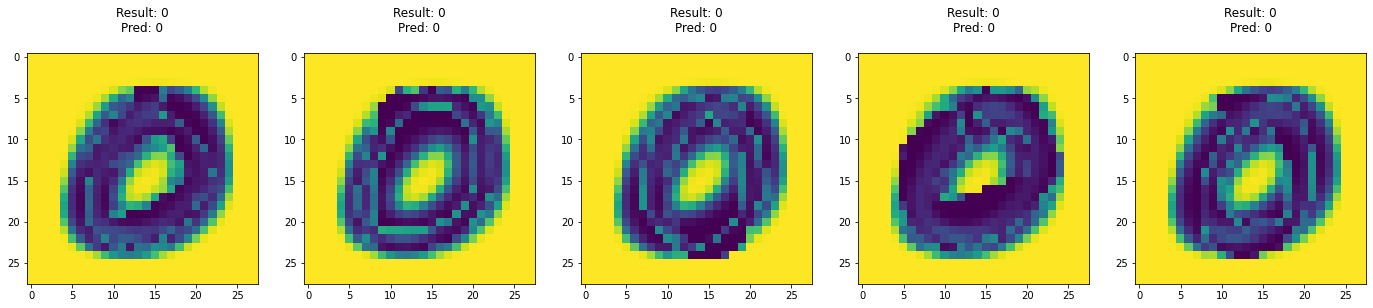

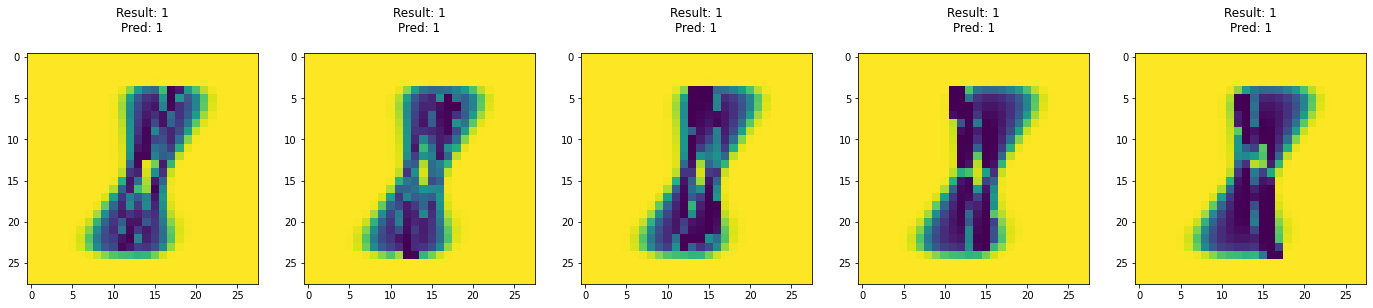

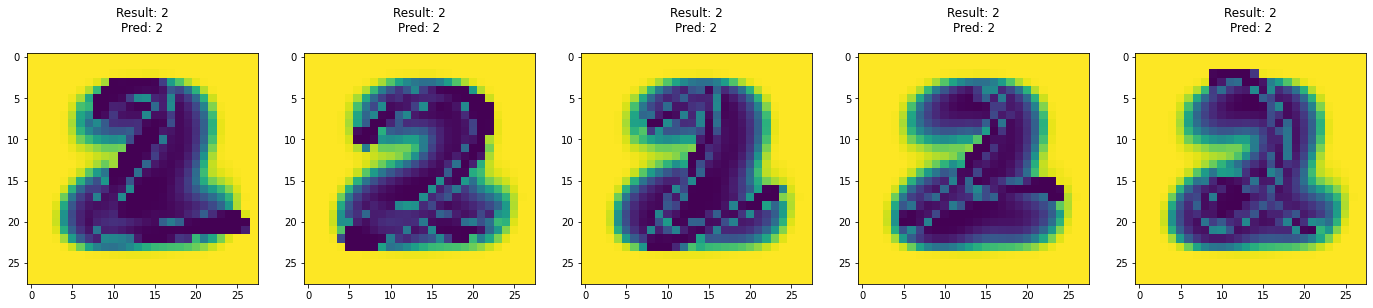

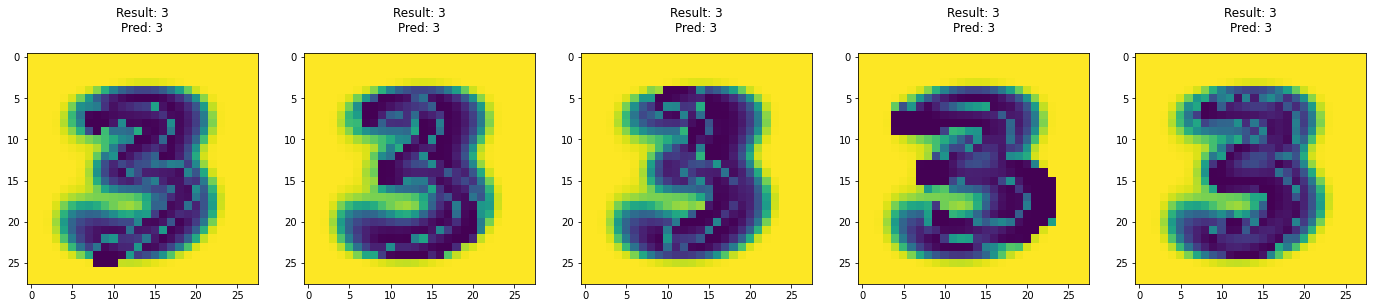

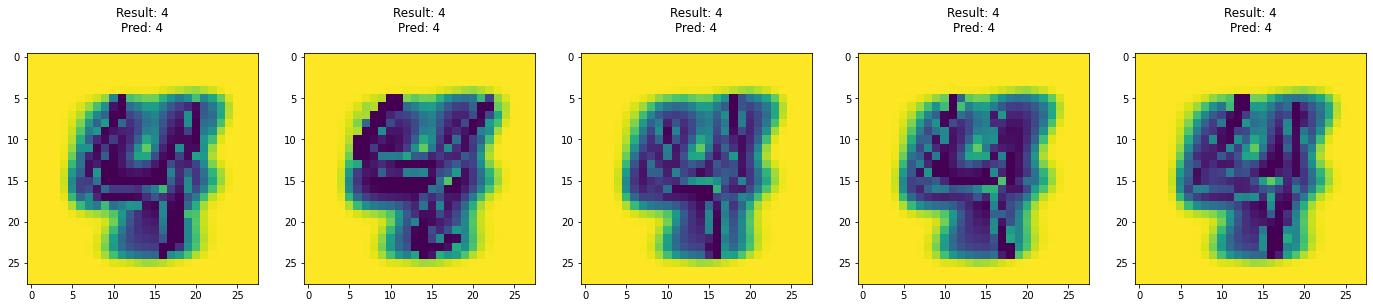

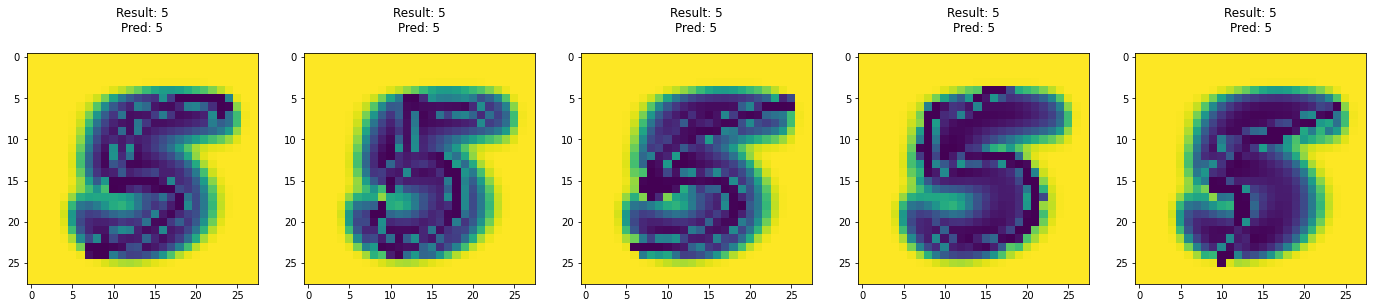

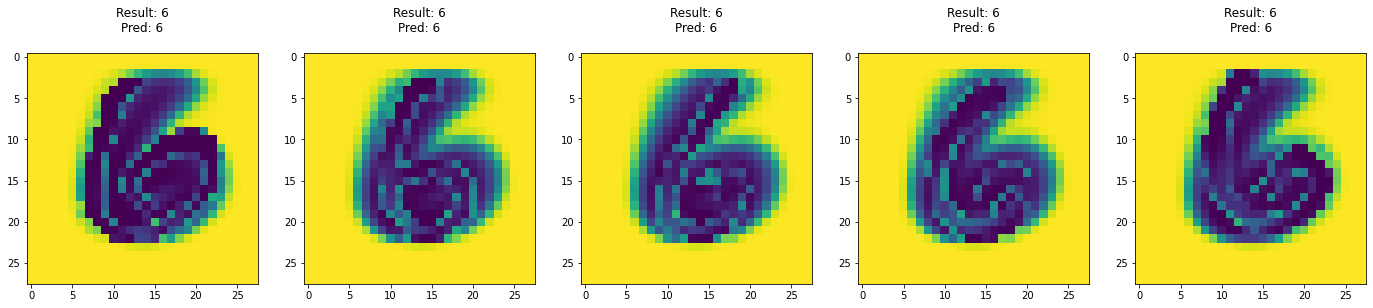

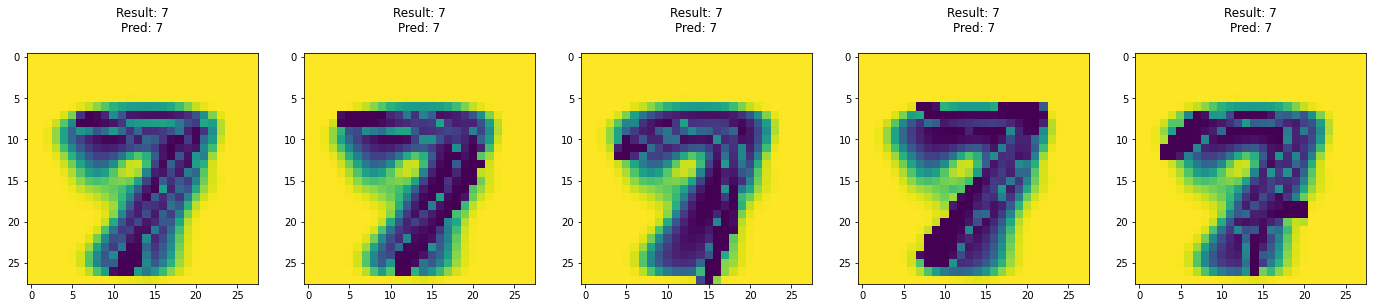

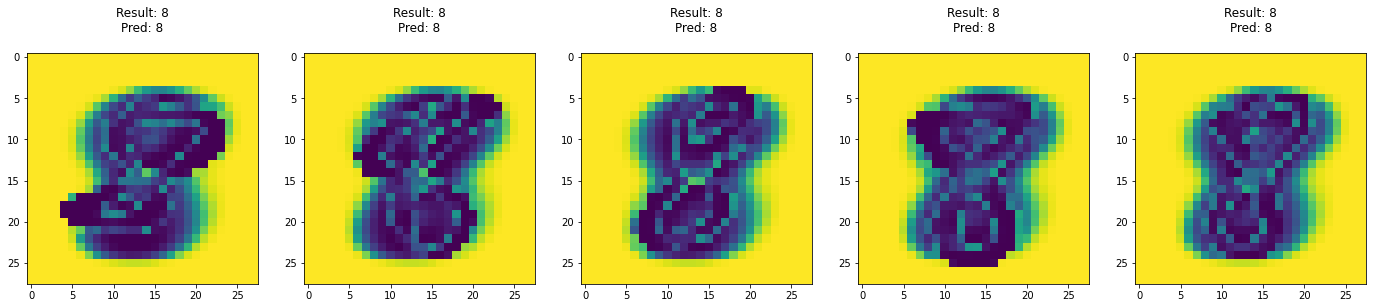

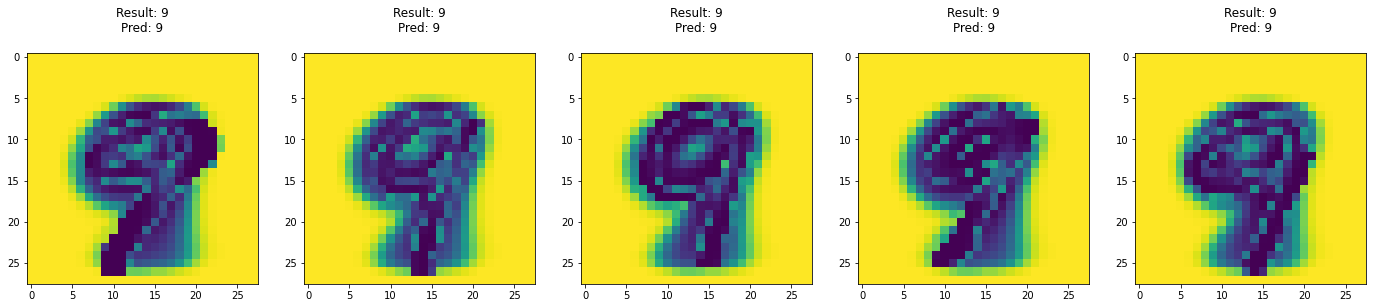

In [18]:
for i in range(10):
    plt.subplots(1,5, figsize=(24,10))
    for j in range(5):
        l1 = plt.subplot(1, 5, j + 1)
        l1.set_title('Result: {}\nPred: {}\n'.format(i, prediction[correct_imgs[i][j]]))
        l1.imshow(likelihood[correct_imgs[i][j]][prediction[correct_imgs[i][j]]].numpy().reshape(28,28))

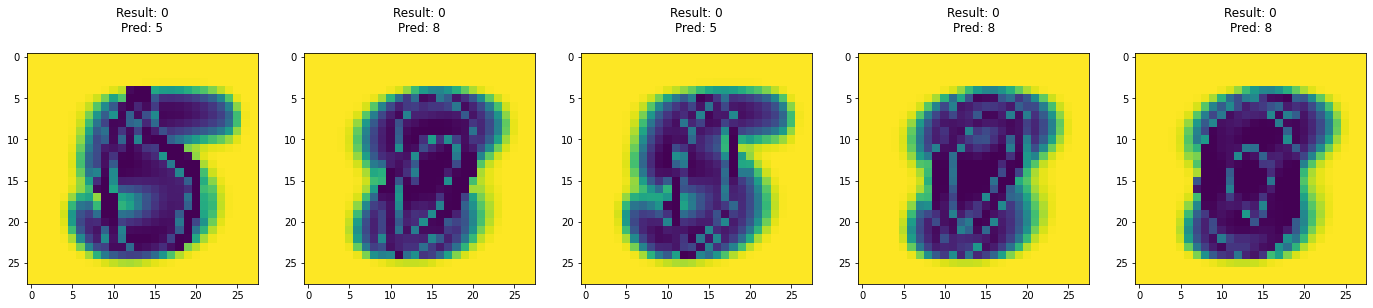

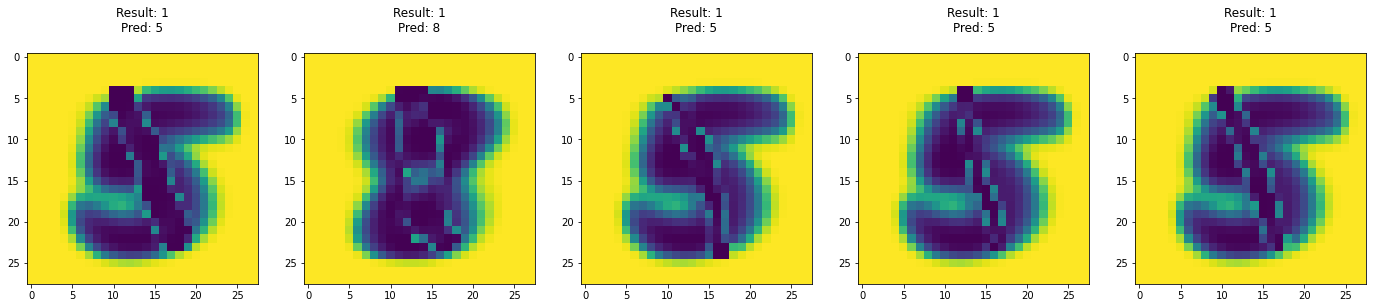

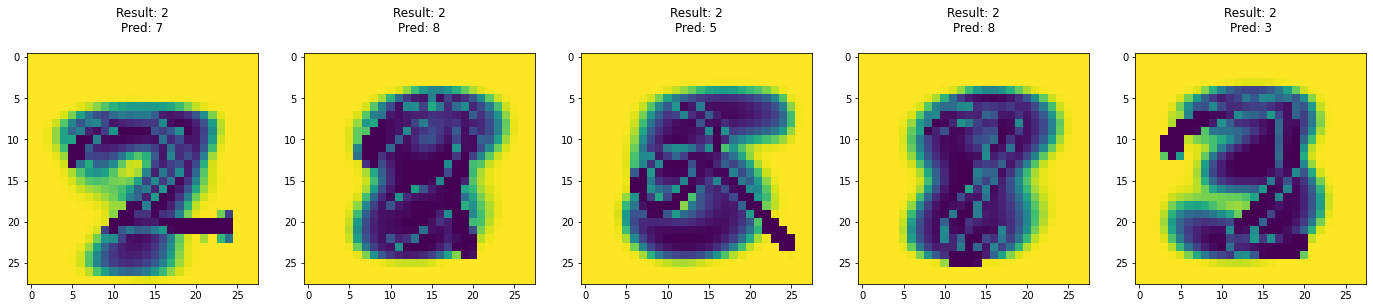

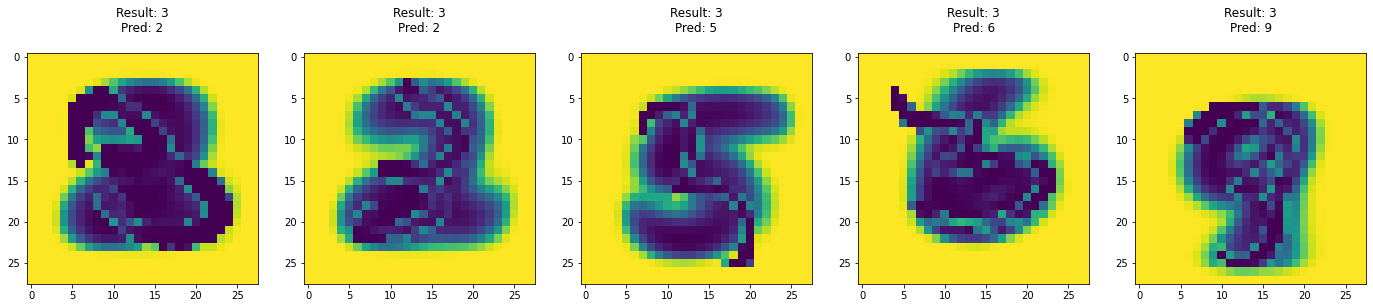

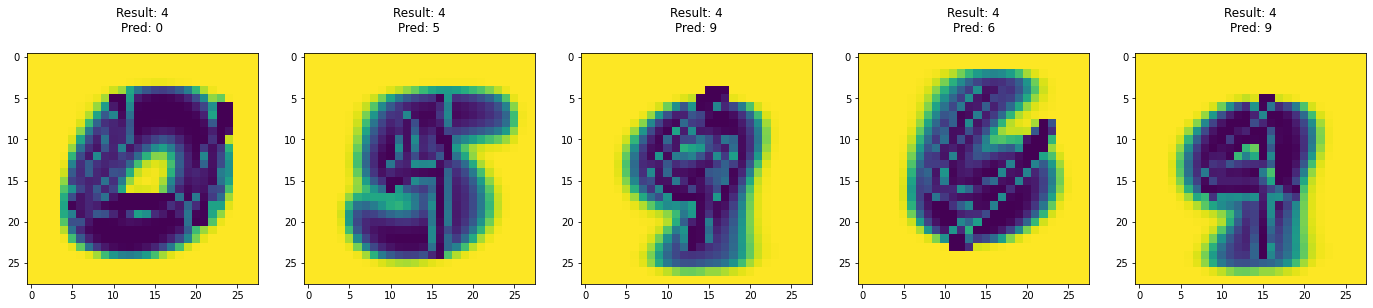

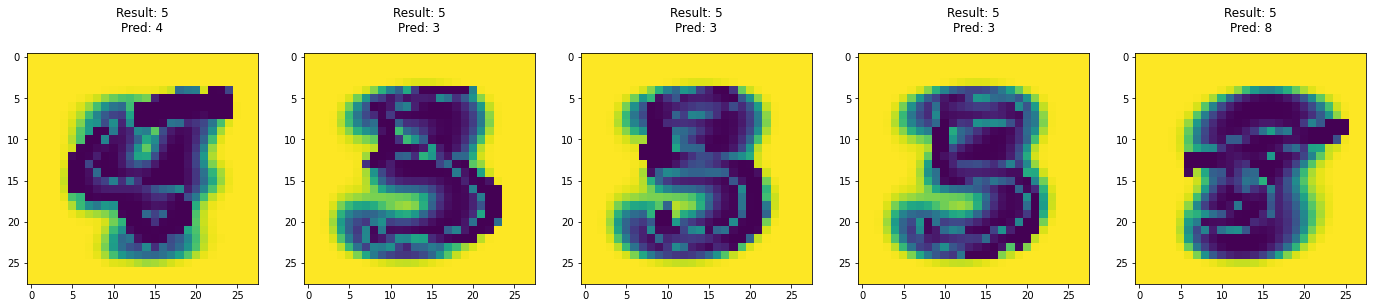

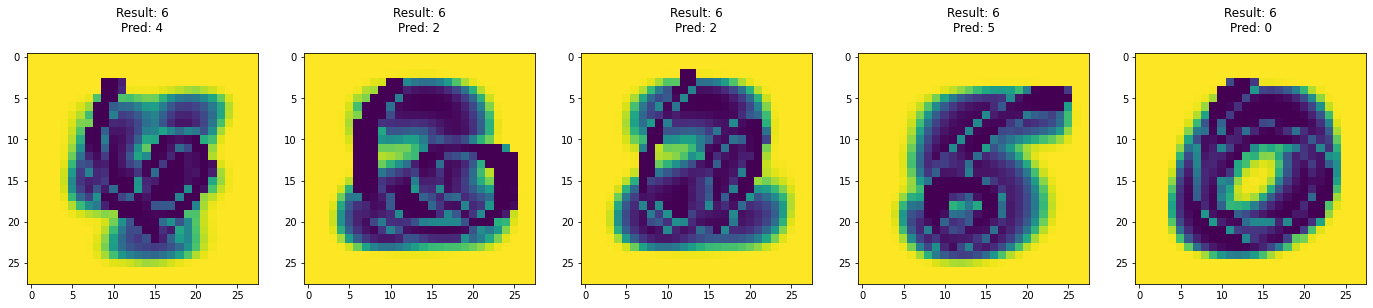

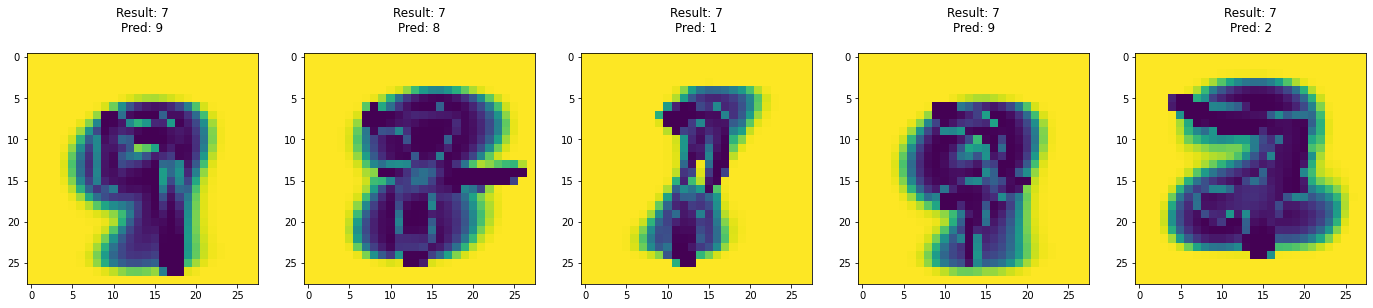

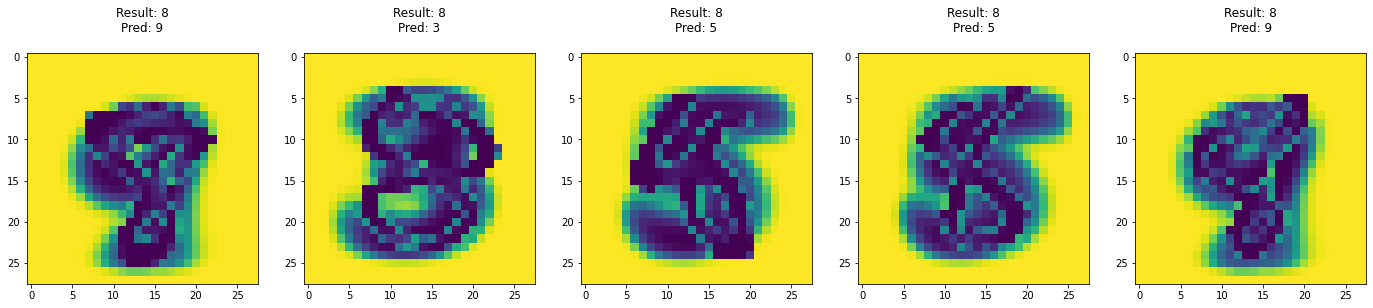

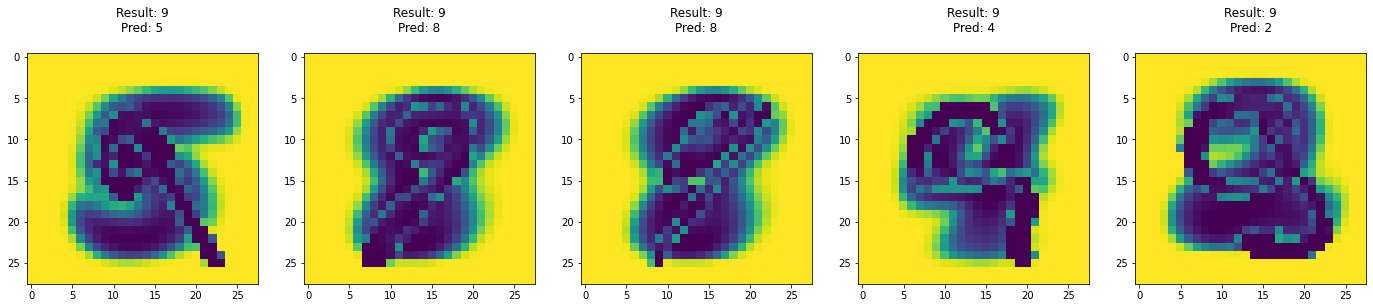

In [19]:
for i in range(10):
    plt.subplots(1,5, figsize=(24,10))
    for j in range(5):
        l1 = plt.subplot(1, 5, j + 1)
        l1.set_title('Result: {}\nPred: {}\n'.format(i, prediction[incorrect_img[i][j]]))
        l1.imshow(likelihood[incorrect_img[i][j]][prediction[incorrect_img[i][j]]].numpy().reshape(28,28))

Naive bayes gives pretty low accuracy because it consideres all the probablities as independent of each other.
With naive Bayes probability, it is challenging to distinguish between the classes from the probability images of the samples.
It is very clear that the naive assumption is incorrect.
The Nave Bayes classifier makes the false assumption that each dimension is independent of the others which is the reason for 
low accuracy

# TASK 3

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import seaborn as sb

In [21]:
%matplotlib inline

In [22]:
mnist = tf.keras.datasets.mnist

In [23]:
#Load the MNIST data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [24]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [25]:
#Reshaping
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [26]:
inputs = Input(shape=(784,))
x = Dense(64, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [27]:
model.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 1s 2ms/step - loss: 27.3058 - accuracy: 0.0970
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 27.3054 - accuracy: 0.0972
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 27.3052 - accuracy: 0.0946
Epoch 4/5
600/600 [==============================] - 1s 2ms/step - loss: 27.3052 - accuracy: 0.0925
Epoch 5/5
600/600 [==============================] - 1s 2ms/step - loss: 27.3051 - accuracy: 0.0897


In [29]:
pred = model.predict(x_test)
t_loss, t_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 27.2509 - accuracy: 0.0889


313/313 [==============================] - 0s 1ms/step


<AxesSubplot:>

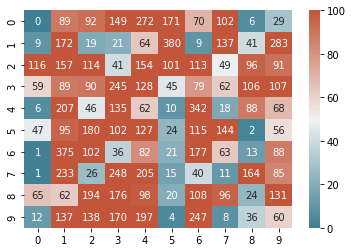

In [30]:
pred = model.predict(x_test)
pred_c = tf.argmax(pred, axis=1)
confusion_matrix = tf.math.confusion_matrix(y_test, pred_c)
cmap = sb.diverging_palette(220, 20, as_cmap=True)
sb.heatmap(confusion_matrix,annot = True,cmap=cmap,fmt = 'g',vmin=0, vmax=100)
# print('Confusion matrix:\n', conf_matrix.numpy())

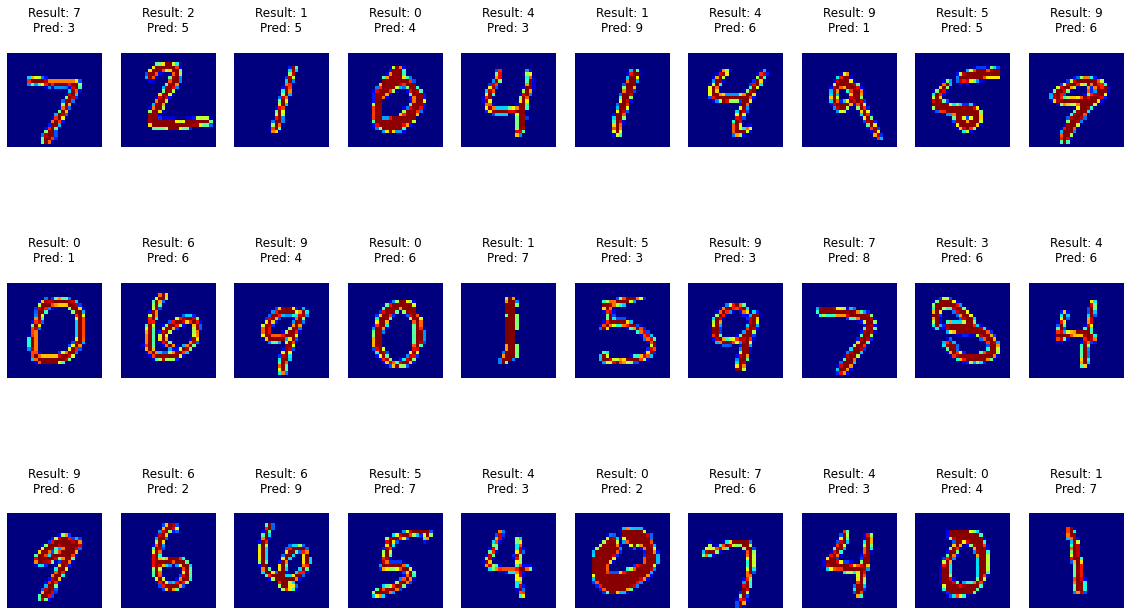

In [31]:
rows = 3
cols = 10
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(2*cols,4*rows))
for j in range(n):
    image = axes[j//cols, j%cols]
    image.imshow(x_test[j].reshape(28, 28), cmap='jet')
    image.set_title('Result: {}\nPred: {}\n'.format(
        y_test[j], pred_c[j],))
    image.axis('off')
    if y_test[j] == pred_c[j]:
        image.spines['bottom'].set_visible(True)
        image.spines['top'].set_visible(True)
        image.spines['right'].set_visible(True)
        image.spines['left'].set_visible(True)
    else:
        image.spines['bottom'].set_visible(True)
        image.spines['top'].set_visible(True)
        image.spines['right'].set_visible(True)
        image.spines['left'].set_visible(True)
plt.show()